<a href="https://colab.research.google.com/github/yunjeong-chang/2021_MachineLearning/blob/main/5%EC%A3%BC%EC%B0%A8_Assignment(2)_%EC%9E%90%EB%8F%99%EC%B0%A8%20%EA%B0%80%EA%B2%A9%20%EC%98%88%EC%B8%A1_18012576_%EC%9E%A5%EC%9C%A4%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<KNN을 통한 회귀문제>**

**: 자동차 가격 예측**

본 데이터 셋은 kaggle open dataset으로, 영국의 중고차량 정보들로 구성되어있습니다.

목표
해당 데이터 셋은 중고 차량에 대한 가격, 변속기, 마일리지, 연료 유형, 도로세, 갤런당 마일리지(mpg), 제조회사 및 엔진 크기 등을 확인할 수 있습니다.
위에 언급한 차량의 정보들(제조회사, 엔진크기, 변속기 등)을 통하여 해당 차량의 가격을 예측하는 것이 해당 실습의 목표입니다.

*   company - 자동차 제조 회사를 의미하며, 총 5개(bmw, ford, hyundai, audi, toyota)의 회사로 구성되어있습니다.
* model - 해당 차량의 제품명(모델)을 의미합니다.
* year - 해당 차량의 제조년도를 의미합니다.
* transmission - 해당 차량의 변속기를 의미합니다.
* mileage - 해당 차량의 마일리지를 의미합니다.
* fueltype - 해당 차량의 연료 유형을 의미합니다.
* tax - 해당 차량의 세금을 의미합니다.
* mpg - 해당 차량의 마일 당 갤런 사용량(연비)를 의미합니다.
* enginesize - 해당 차량의 엔진 크기를 의미합니다. 
* price - 해당 차량의 가격을 의미합니다.


해당 문제의 평가 방식은 MAE(Mean Absolute Error)입니다.

In [538]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [539]:
#데이터 불러오기
train = pd.read_csv('/content/train_data.csv')
test = pd.read_csv('/content/test_data.csv')
submit = pd.read_csv('/content/sample_submit.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


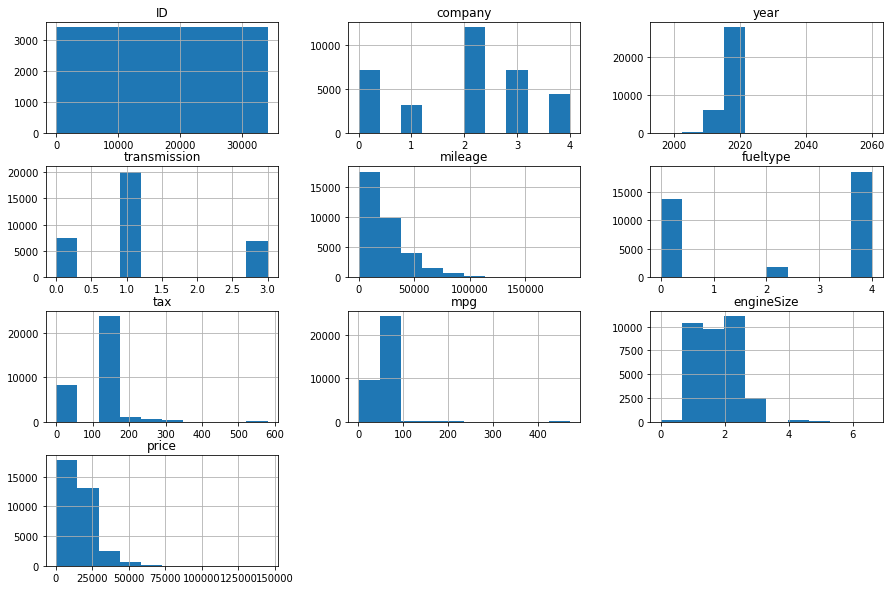

In [540]:
#데이터 시각화
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
train.hist(ax=ax)
plt.show()

In [541]:
#필요없는 클래스 제거
train = train.drop('ID', axis=1)
test = test.drop('ID', axis=1)

train = train.drop('tax', axis=1)
test = test.drop('tax', axis=1)

In [542]:
#학습 데이터 슬라이싱
x = train.drop('price', axis=1)
y = train['price']

In [543]:
#실수화
from sklearn.preprocessing import LabelEncoder

classle = LabelEncoder()
x['model'] = classle.fit_transform(x['model'].values)
test['model'] = classle.fit_transform(test['model'].values) 

In [544]:
#표준화
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(x)
x_std = scale.transform(x)
test_std = scale.transform(test)

In [545]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5, weights= "distance") 
knn.fit(x_std, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='distance')

In [546]:
#예측
pred = knn.predict(test_std)
pred

array([ 7946.33165117,  9219.87558476, 19753.11277733, ...,
       14602.09479315, 29882.70465835, 11851.78172383])

In [547]:
#제출할 파일에 넣기
for i in range(len(pred)):
  submit['price'][i] = (pred[i])

submit

,ID,price
0,0,7946
1,1,9219
2,2,19753
3,3,12180
4,4,9956
...,...,...
16826,16826,10600
16827,16827,12525
16828,16828,14602
16829,16829,29882


In [548]:
submit.to_csv('car_price_submit_18012576.csv',index=False)